<a href="https://colab.research.google.com/github/jiayizhang19/Deep_Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS401 Assignment 2 - Part 2: CNN for Classification Using CIFAR-10 Dataset**


# Task 1: Implementing a Standard CNN
## Task 1a: Load and Prepare the CIFAR-10 Dataset
Here is a brief explanation and preparation on CIFAR-10 dataset:
- CIFAR-10 contains 60,000 32x32x3 color images in 10 classes.
- 50,000 images are used for training dataset and 10,000 are used for testing dataset.
- Images will be normolized to [0,1] from [0,255] for better convergence.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import datasets, layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Check dataset shape
print("Training data shape (x_train):", x_train.shape)
print("Training labels shape (y_train):", y_train.shape)
print("Test data shape (x_test):", x_test.shape)
print("Test labels shape (y_test):", y_test.shape)

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step
Training data shape (x_train): (50000, 32, 32, 3)
Training labels shape (y_train): (50000, 1)
Test data shape (x_test): (10000, 32, 32, 3)
Test labels shape (y_test): (10000, 1)


## Task 1b: Design CNN Architecture
- **Convolutional block x 3**
  - **Convolutional layer x 2** --> Extract different features
    - Different number of filters are used in each block, from 32 (first block), to 64 (second block) to 128 (third block).
    - A 3x3 kernel
    - A ReLU activation function
    - Zero-padding is applied to ensure an equal treatment of edge pixels so that the kernel can slide over every pixel uniformly. Also it keeps the size of output is completely the same as the input for
  - **Batch Normalization x 1** --> Stablizes training and accelerates convergence.
  - **Max pooling layer x 1** --> Reduces spatial dimensions while preserving important features.
    - A 2x2 max pooling
  - **Dropout layer x 1** --> Regularization to prevents overfitting.
    - A 25% dropout is applied in each convolutional block
    - A 50% dropout is applied in the fianl fully connected layer
- **Fully connected layer x 1**
  - Flatten 3D output into 1D vector
  - Dense layer is designed to combine and weight all features
    - First dense layer with 256 features for complex patterns modelling
    - Second dense layer with 10 features is used to produce a probability distribution over 10 classes
  - A Softmax function for final classification



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 816,938 (3.12 MB)

 Trainable params: 815,530 (3.11 MB)

 Non-trainable params: 1,408 (5.50 KB)

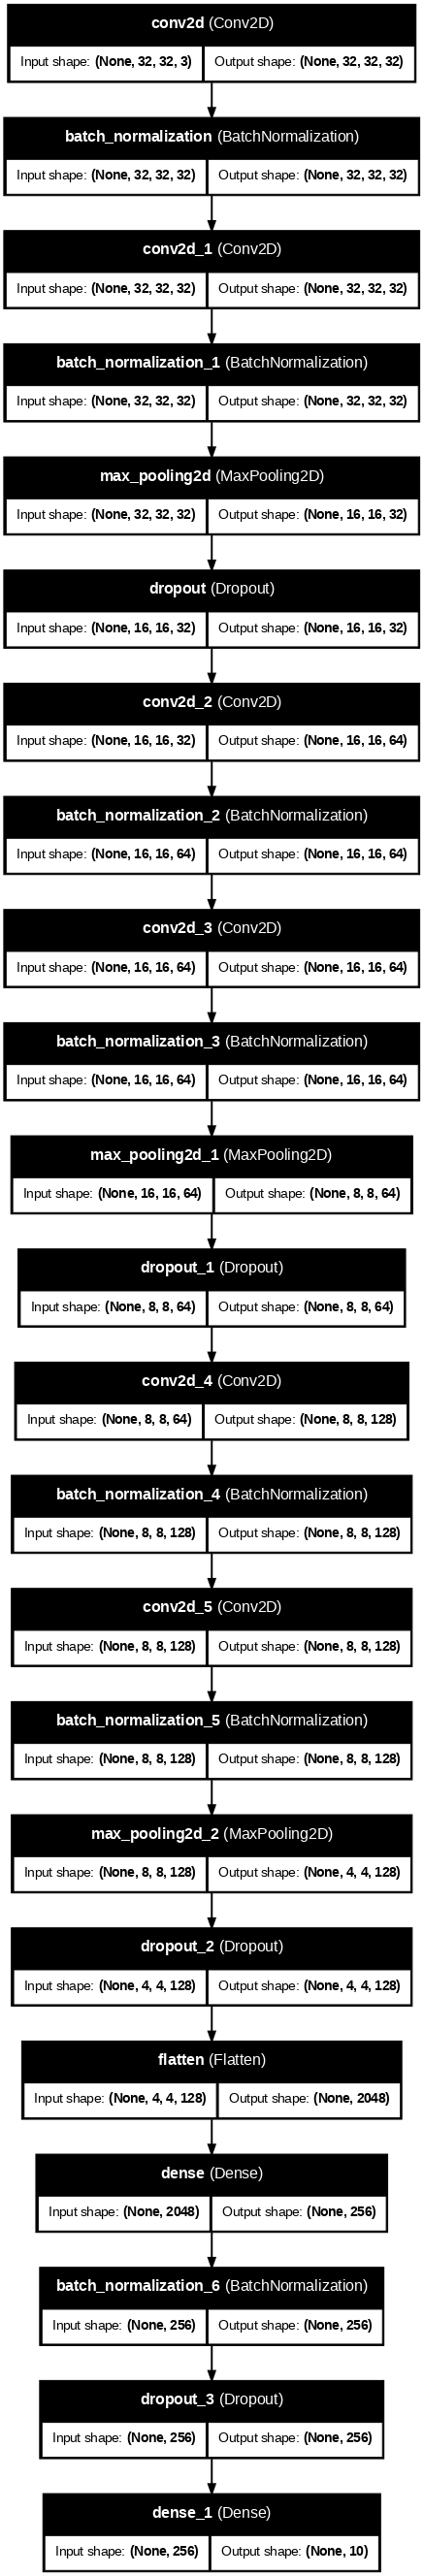

In [3]:
def create_cnn_model():
    model = models.Sequential([
        # Convolutional block 1
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Convolutional block 2
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Convolutional block 3
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Fully connected layers for classification
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Build and plot the model
model = create_cnn_model()
model.summary()
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    # Make the plot a smaller size
    dpi=70,
)


## Task 1c: Training the model
- Optimizer: Adam
- Learning rate: 0.001, standard starting point for Adam optimizer
- Callback: Use early stopping as regularization to prevent overfitting
  - Early Stopping: Stop training early if the model stops improving on the monitored metric (val_loss by default).
  - ReduceLROnPlateau: Dynamically reduces the learning rate when the monitored metric stops improving.
- Batch size: 64, start from a medium batch to balance training speed and gradient descent quality
- Epoch: 50
- Validation Split: 20% of training dataset will be used as validation dataset

In [4]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

# Define callbacks
callback = [
    # if the validation metric does not improve for 10 consecutive epochs, training will stop
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    #  if the validation metric does not improve for 5 consecutive epoches, the learning rate is reduced. (multiplied by factor)
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
]

# Train the model[]
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    callbacks=callback,
    verbose=0 # Disable the progress bar and detailed output during training
)

## Task 1d: Plotting and Interpreting Results
In general, this model reaches 96.87% training accuracy and 84.88% test accuracy which is good for this dataset, indicating strong learning capacity. However, it still has overfitting.
- Accuracy (Training VS Test)
  - Training accuracy climbs rapidly to 0.96 while test accuracy fluctutates around 0.85.
- Loss (Training VS Test)
  - Traning loss is descreasing steadily to 0.12 among all epochs while validation loss drops quickly at first then fluctutates around 0.5 after about 10 epochs.

- Generalization (Training VS Validation)
  - The 12% gap between training and validation accuracy indicates the model memorizes training data more than generalizing. Regularization like dropout and early stopping helps but overfitting still exists.

- Convergence
  - Both training and validation curves flatten after around 20 epoches, meaning the model has converged. Further training would not significantly improve performance.
  
In summary, the model is strong enough with a 85% test accuracy. Correct predictions in confusion matrix is high as shown in value of diagonal cells. And the model performs equally on each class without any severe class imbalance.

In [ ]:
def plot_train_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

  # Plot loss
  ax1.plot(history.history['loss'], label='Training Loss')
  ax1.plot(history.history['val_loss'], label='Validation Loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.set_title('Training and Validation Loss')
  ax1.legend()
  ax1.grid(True)

  # Plot accuracy
  ax2.plot(history.history['accuracy'], label='Training Accuracy')
  ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.set_title('Training and Validation Accuracy')
  ax2.legend()
  ax2.grid(True)

  plt.tight_layout()
  plt.show()

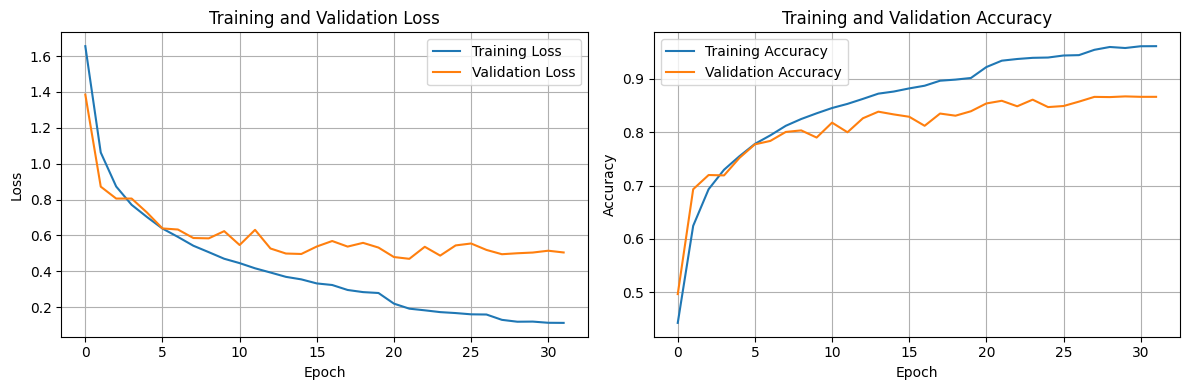

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9887 - loss: 0.0480

Train Loss: 0.1252
Train Accuracy: 0.9649
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8496 - loss: 0.5079

Test Loss: 0.5142
Test Accuracy: 0.8488
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


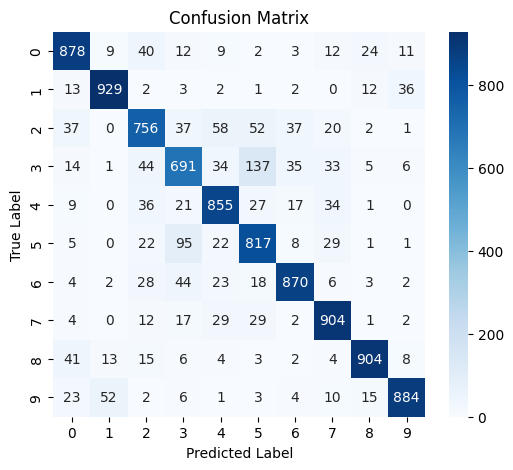

In [ ]:
# Plot loss and accuracy
plot_train_history(history)

# Evaluate on train and test dataset
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"\nTrain Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Task Two: Experiment with Architecture and Parameters
## Task 2a: Doubling Convolutional Layers
- Change Made Compared to Task 1:
  - Double the number of convolutional layers in each convolutional block
- Model Performance Comparasion:
  - Accuracy:
    | Accuracy | New CNN (Double Layers) | Original CNN |
    | ---------| -------------------| ------------------|
    | Train Accuracy | 0.9612 | 0.9649 |
    | Test Accuracy | 0.8524 | 0.8488 |
    - Test accuracy improves slightly, suggests better performance on unseen data.
  - Generalization (accuracy gap at convergence):
    - The gap between test and validation accuracy is similiar to the original architecture.
  - Convergence:
    - Validation loss fluctuates more and remains higher than the original architecture.


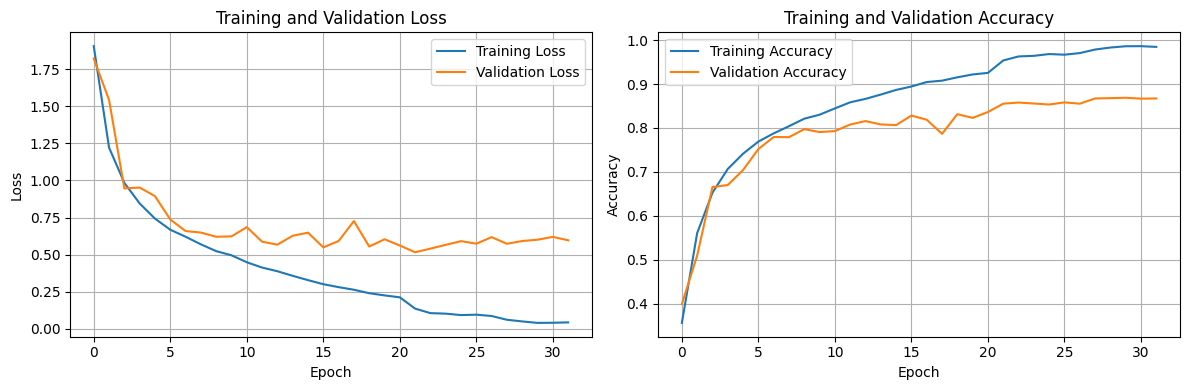

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9846 - loss: 0.0532

Train Loss: 0.1371
Train Accuracy: 0.9612
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8563 - loss: 0.5235

Test Loss: 0.5265
Test Accuracy: 0.8524
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


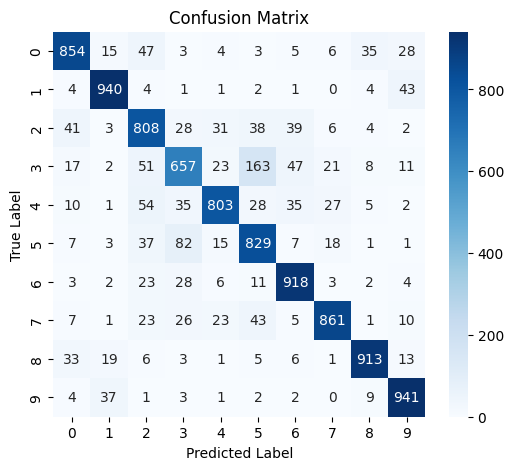

In [ ]:
# ==================================================================== #
# ======================== Build the Model =========================== #
# ==================================================================== #
def create_cnn_model_double_layers():
  model = models.Sequential([
    # Convolutional block 1
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Convolutional block 2
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Convolutional block 3
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Fully connected layers for classification
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
  ])
  return model

# Build and plot the model
model_double_layers = create_cnn_model_double_layers()

# ================================================================= #
# ======================== Train the Model ======================== #
# ================================================================= #
# Compile the model
model_double_layers.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

# Define callbacks
callback = [
    # if the validation metric does not improve for 10 consecutive epochs, training will stop
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    #  if the validation metric does not improve for 5 consecutive epoches, the learning rate is reduced. (multiplied by factor)
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
]

history_double_layers = model_double_layers.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    callbacks=callback,
    verbose=0 # Disable the progress bar and detailed output during training
)

# ============================================================== #
# ================ Plot and Evaluate the Model ================= #
# ============================================================== #
# Plot loss and accuracy
plot_train_history(history_double_layers)

# Evaluate on train and test dataset
train_loss, train_accuracy = model_double_layers.evaluate(x_train, y_train)
print(f"\nTrain Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
test_loss, test_accuracy = model_double_layers.evaluate(x_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot confusion matrix
y_pred_double_layers = np.argmax(model_double_layers.predict(x_test), axis=1)
conf_matrix_double_layers = confusion_matrix(y_test, y_pred_double_layers)
plt.figure(figsize=(6, 5))
# Plot Confusion Matrix
sns.heatmap(conf_matrix_double_layers, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Task 2b: Changing Kernel Size
- Change Made Compared to Task 1:
  - Kernel size is changed from 3x3 to 5x5
- Model Performance Comparasion:
  - Accuracy:
  | Accuracy | 5x5 Kernel | 3x3 Kernel (original) |
  | ---------| -------------------| ------------------|
  | Train Accuracy | 0.9127 | 0.9649 |
  | Test Accuracy | 0.8100 | 0.8488 |
    -  Both test and training accuracy are lower than the original kernel, indicating weaker performance on unseen data.
  - Generalization (accuracy gap at convergence):
    - The gap is larger than the original kernel, indicating worse generalization.
  - Convergence:
    - Poorer final performance than the original kernel.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


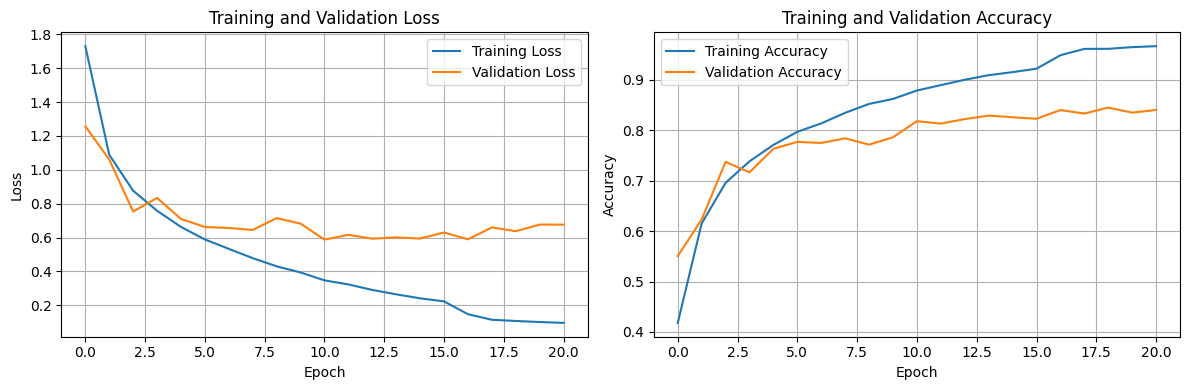

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9335 - loss: 0.1958

Train Loss: 0.2687
Train Accuracy: 0.9127
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8069 - loss: 0.6449

Test Loss: 0.6277
Test Accuracy: 0.8100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


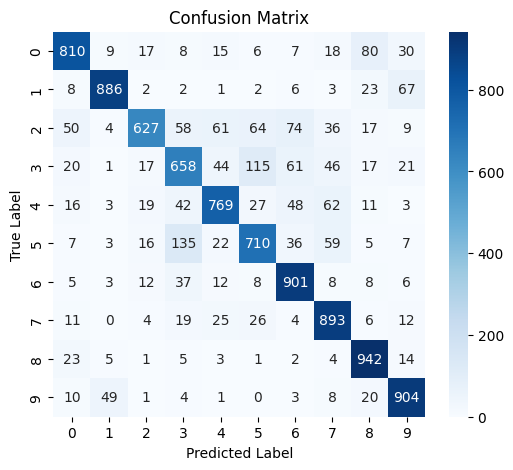

In [ ]:
# ==================================================================== #
# ======================== Build the Model =========================== #
# ==================================================================== #
def create_cnn_model_changing_kernel():
  model = models.Sequential([
    # Convolutional block 1
    layers.Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Convolutional block 2
    layers.Conv2D(64, (5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Convolutional block 3
    layers.Conv2D(128, (5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Fully connected layers for classification
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
  ])
  return model

# Build and plot the model
model_changing_kernel = create_cnn_model_changing_kernel()

# ================================================================= #
# ======================== Train the Model ======================== #
# ================================================================= #
# Compile the model
model_changing_kernel.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

# Define callbacks
callback = [
    # if the validation metric does not improve for 10 consecutive epochs, training will stop
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    #  if the validation metric does not improve for 5 consecutive epoches, the learning rate is reduced. (multiplied by factor)
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
]

history_changing_kernel = model_changing_kernel.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    callbacks=callback,
    verbose=0 # Disable the progress bar and detailed output during training
)

# ============================================================== #
# ================ Plot and Evaluate the Model ================= #
# ============================================================== #
# Plot loss and accuracy
plot_train_history(history_changing_kernel)

# Evaluate on train and test dataset
train_loss, train_accuracy = model_changing_kernel.evaluate(x_train, y_train)
print(f"\nTrain Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
test_loss, test_accuracy = model_changing_kernel.evaluate(x_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot confusion matrix
y_pred_changing_kernel = np.argmax(model_changing_kernel.predict(x_test), axis=1)
conf_matrix_changing_kernel = confusion_matrix(y_test, y_pred_changing_kernel)
plt.figure(figsize=(6, 5))
# Plot Confusion Matrix
sns.heatmap(conf_matrix_changing_kernel, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


## Task 2c: Alternative learning rates
- Change Made Compared to Task 1:
  - Learning rate is changed from original 0.001 to current 0.01 and 0.0001
- Model Performance Comparasion:
  - Accuracy:
  | Accuracy | lr=0.01 | lr=0.0001 |lr=0.001 (original)|
  | ---------| -------------------| ------------------|------------------|
  | Train Accuracy | 0.9127 | 0.9127 | 0.9649 |
  | Test Accuracy | 0.8438 | 0.8256 | 0.8488 |
    - lr=0.01: Almost the same as the original learning rate.
    - lr=0.0001: Lower than the original learning rate.
  - Generalization (accuracy gap at convergence):
    - lr=0.01: Almost the same as the original one.
    - lr=0.0001:The gap is smaller than the original learning rate, suggesting better generalization.
  - Convergence:
    - lr=0.01: Almost the same as the original learning rate.
    - lr=0.0001: Better convergence that is extremely smooth and stable.



Training with learning rate:0.01


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


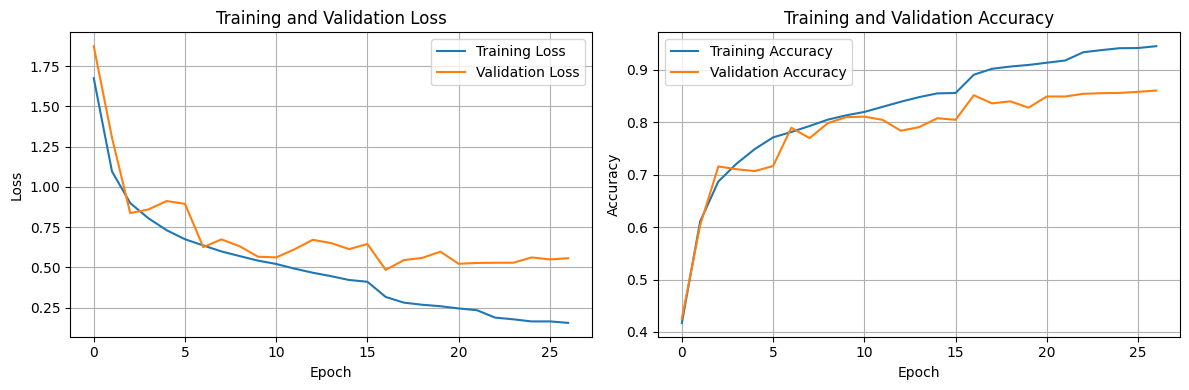

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9559 - loss: 0.1333
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8475 - loss: 0.5042
Train Accuracy with LR=0.01: 0.9127
Train Loss with LR=0.01: 0.2687
Test Accuracy with LR=0.01: 0.8438
Test Loss with LR=0.01: 0.5101

Training with learning rate:0.0001


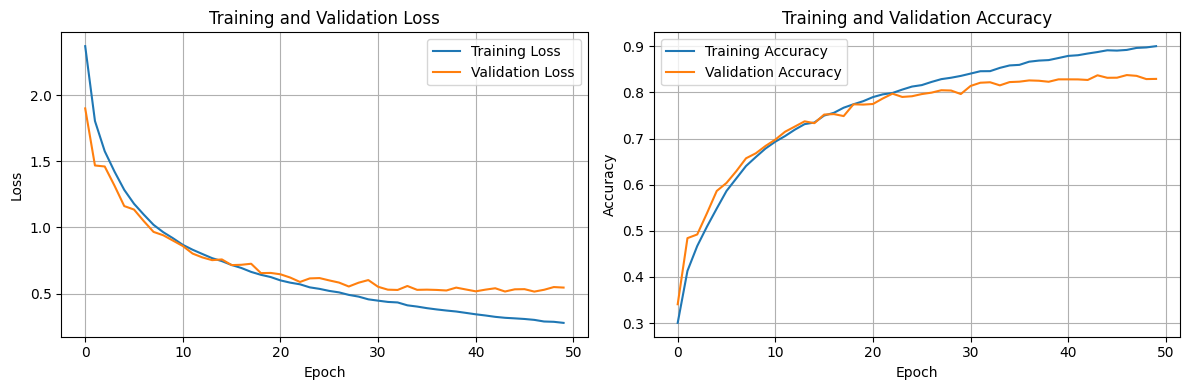

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9708 - loss: 0.1097
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8268 - loss: 0.5398
Train Accuracy with LR=0.0001: 0.9127
Train Loss with LR=0.0001: 0.2687
Test Accuracy with LR=0.0001: 0.8265
Test Loss with LR=0.0001: 0.5409


In [ ]:
# Fit model with changing learning rate
learning_rates = [0.01, 0.0001]
results = {}
for lr in learning_rates:
  print(f'\nTraining with learning rate:{lr}')
  model_lr = create_cnn_model()
  model_lr.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
      loss=tf.keras.losses.sparse_categorical_crossentropy,
      metrics=['accuracy']
  )
  history_lr = model_lr.fit(
      x_train, y_train,
      batch_size=64,
      epochs=50,
      validation_split=0.2,
      callbacks=callback,
      verbose=0 # Disable the progress bar and detailed output during training
   )
  results[lr] = history_lr.history
  plot_train_history(history_lr)
  # Evaluate on test set
  test_loss, test_accuracy = model_lr.evaluate(x_train, y_train)
  test_loss, test_accuracy = model_lr.evaluate(x_test, y_test)
  print(f'Train Accuracy with LR={lr}: {train_accuracy:.4f}')
  print(f'Train Loss with LR={lr}: {train_loss:.4f}')
  print(f'Test Accuracy with LR={lr}: {test_accuracy:.4f}')
  print(f'Test Loss with LR={lr}: {test_loss:.4f}')

## Task 2d: Alternative Activation Function
- Change Made Compared to Task 1:
  - Activation function is changed from ReLU to Tanh
- Model Performance Comparasion:
  - Accuracy:
  | Accuracy | tanh (new) |relu (original)|
  | ---------| -------------------| ------------------|
  | Train Accuracy | 0.8800 | 0.9649 |
  | Test Accuracy | 0.7926 | 0.8488 |
    - Test accuracy decreases greatly compared to using ReLU.
  - Generalization (accuracy gap at convergence):
    - The gap is smaller than the original one, which is good. But the lower accuracies for both training and validation, suggesting underfitting rather than overfitting.
  - Convergence:
    - Both training and validation curves decrease steadily but remain relatively high and the model converges slower than the original one, indicating slower learning than the original ReLU function.

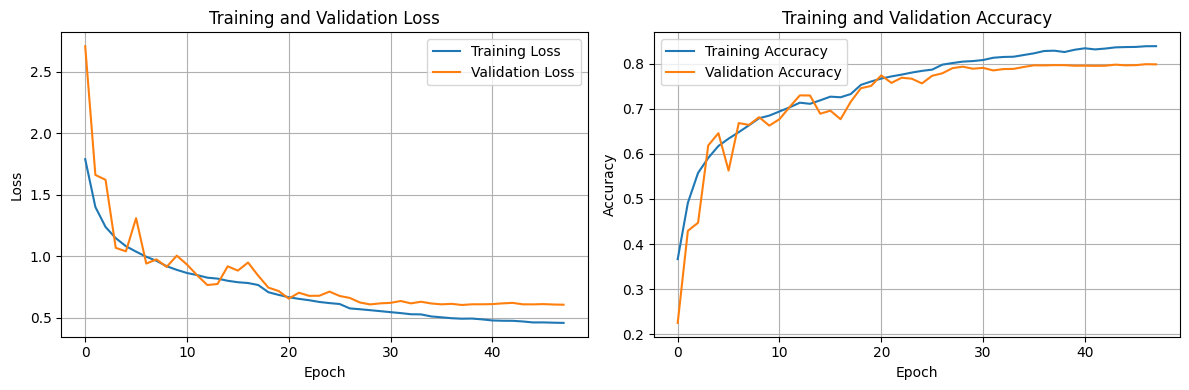

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9009 - loss: 0.2912

Train Loss: 0.3522
Train Accuracy: 0.8800
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7922 - loss: 0.6321

Test Loss: 0.6286
Test Accuracy: 0.7926
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


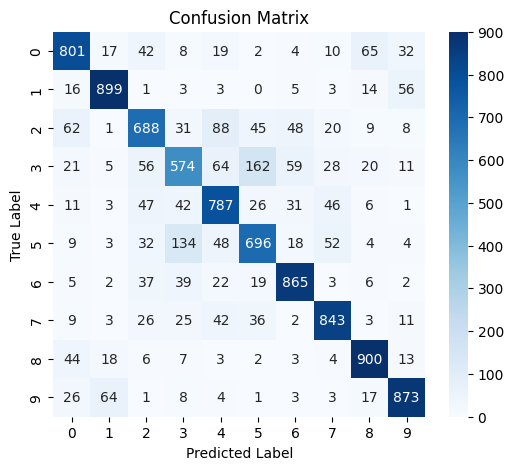

In [ ]:
# ==================================================================== #
# ======================== Build the Model =========================== #
# ==================================================================== #
def create_cnn_model_changing_actv():
  model = models.Sequential([
    # Convolutional block 1
    layers.Conv2D(32, (3,3), activation='tanh', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='tanh', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Convolutional block 2
    layers.Conv2D(64, (3,3), activation='tanh', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='tanh', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Convolutional block 3
    layers.Conv2D(128, (3,3), activation='tanh', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='tanh', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Fully connected layers for classification
    layers.Flatten(),
    layers.Dense(256, activation='tanh'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
  ])
  return model

# Build and plot the model
model_changing_actv = create_cnn_model_changing_actv()

# ================================================================= #
# ======================== Train the Model ======================== #
# ================================================================= #
# Compile the model
model_changing_actv.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

# Define callbacks
callback = [
    # if the validation metric does not improve for 10 consecutive epochs, training will stop
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    #  if the validation metric does not improve for 5 consecutive epoches, the learning rate is reduced. (multiplied by factor)
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
]

history_changing_actv = model_changing_actv.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    callbacks=callback,
    verbose=0 # Disable the progress bar and detailed output during training
)

# ============================================================== #
# ================ Plot and Evaluate the Model ================= #
# ============================================================== #
# Plot loss and accuracy
plot_train_history(history_changing_actv)

# Evaluate on train and test dataset
train_loss, train_accuracy = model_changing_actv.evaluate(x_train, y_train)
print(f"\nTrain Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
test_loss, test_accuracy = model_changing_actv.evaluate(x_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot confusion matrix
y_pred_changing_actv = np.argmax(model_changing_actv.predict(x_test), axis=1)
conf_matrix_changing_actv = confusion_matrix(y_test, y_pred_changing_actv)
plt.figure(figsize=(6, 5))
# Plot Confusion Matrix
sns.heatmap(conf_matrix_changing_actv, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Task 2e: Alternative Optimizers
- Change Made Compared to Task 1:
  - Using SGD and RMSprep as optimizer
- Model Performance Comparasion:
  - Accuracy:
  | Accuracy | sgd (new) | rmsp (new) |adam (original)|
  | ---------| -------------------| ------------------|--------|
  | Train Accuracy | 0.8800 | 0.8800 | 0.9649 |
  | Test Accuracy | 0.6641 | 0.8527 | 0.8488 |
    - SGD: Test accuracy decreases greatly compared to Adam optimiser, indicating poor performance.
    - RMSprop: Improves slightly compared to Adam.
  - Generalization (accuracy gap at convergence):
    - SGD: The gap is slightly smaller than Adam, indicating good generalization.
    - RMSprop: Large gap between train and validation accuracy, indicating poor generalization.
  - Convergence:
    - SGD: Converges very slow over around 50 epoches.
    - RMSprop: Converges better than SGD, stable and smooth convergence similiar to Adam.


Training with optimizer: <keras.src.optimizers.sgd.SGD object at 0x7c39dfd80f50>


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


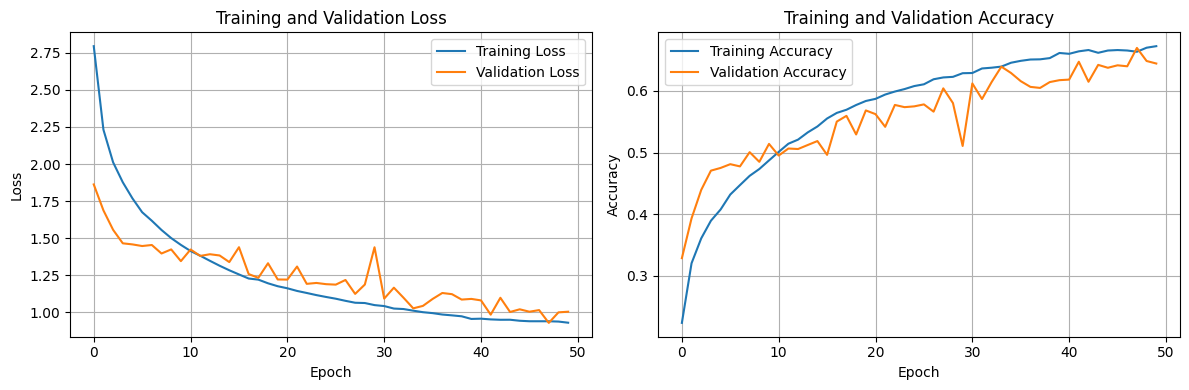

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6846 - loss: 0.8790
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6650 - loss: 0.9269
Train Accuracy with optimizer sgd: 0.8800
Train Loss with optimizer sgd: 0.3522
Test Accuracy with optimizer sgd: 0.6641
Test Loss with optimizer sgd: 0.9380

Training with optimizer: <keras.src.optimizers.rmsprop.RMSprop object at 0x7c39dd25c530>


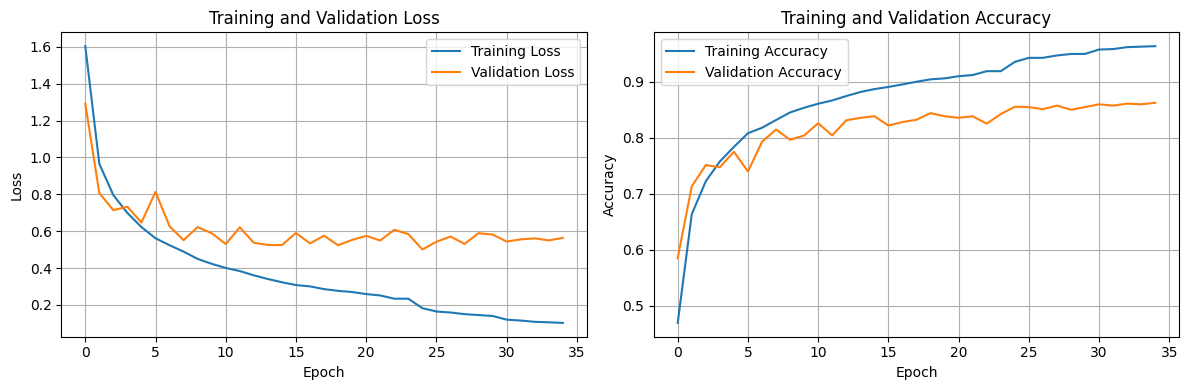

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9894 - loss: 0.0459
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8494 - loss: 0.5414
Train Accuracy with optimizer rmsp: 0.8800
Train Loss with optimizer rmsp: 0.3522
Test Accuracy with optimizer rmsp: 0.8527
Test Loss with optimizer rmsp: 0.5224


In [ ]:
optimizers = {
    'sgd': tf.keras.optimizers.SGD(learning_rate=0.001),
    'rmsp': tf.keras.optimizers.RMSprop(learning_rate=0.001)
}
results = {}
for name, optimizer in optimizers.items():
  print(f'\nTraining with optimizer: {optimizer}')
  model_opt = create_cnn_model()
  model_opt.compile(
      optimizer=optimizer,
      loss=tf.keras.losses.sparse_categorical_crossentropy,
      metrics=['accuracy']
  )
  history_opt = model_opt.fit(
      x_train, y_train,
      batch_size=64,
      epochs=50,
      validation_split=0.2,
      callbacks=callback,
      verbose=0 # Disable the progress bar and detailed output during training
   )
  results[name] = history_opt.history
  plot_train_history(history_opt)
  # Evaluate on test set
  test_loss, test_accuracy = model_opt.evaluate(x_train, y_train)
  test_loss, test_accuracy = model_opt.evaluate(x_test, y_test)
  print(f'Train Accuracy with optimizer {name}: {train_accuracy:.4f}')
  print(f'Train Loss with optimizer {name}: {train_loss:.4f}')
  print(f'Test Accuracy with optimizer {name}: {test_accuracy:.4f}')
  print(f'Test Loss with optimizer {name}: {test_loss:.4f}')

## Task 2f: Batch Size
- Change Made Compared to Task 1:
  - Batch size is changed from the original 64 to current 32 and 256
- Model Performance Comparasion:
  - Accuracy:
  | Accuracy | batch_size=32 | batch_size=256 |batch_size=64 (original)|
  | ---------| -------------------| ------------------|------------------|
  | Train Accuracy | 0.8911 | 0.8911 | 0.9649 |
  | Test Accuracy | 0.8533 | 0.8452 | 0.8488 |
    - Test accuracy is slightly up using a smaller batch size of 64.
  - Generalization (accuracy gap at convergence):
    - batch_size=32: Smooth and stable, similiar gap with original 64 batch size.
    - batch_size=256: The gap narrows slightly, indicating better generalization compared to the original batch size.
  - Convergence:
    - batch_size=32: Smooth and stable, similiar convergence speed with original 64 batch size.
    - batch_size=256: Fast initial rise for accuracy and fast initial drop for loss but stable for later epoches.


Training with batch size:32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


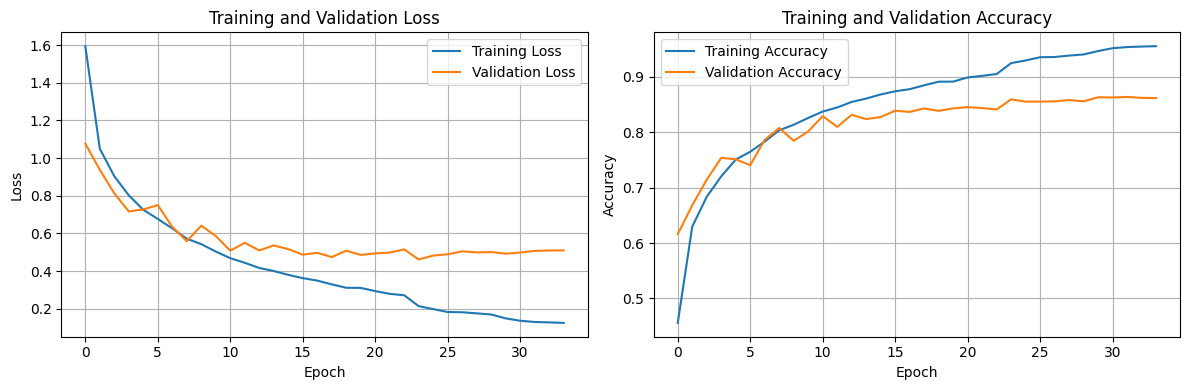

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9892 - loss: 0.0468
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8535 - loss: 0.4953
Train Accuracy with batch size=32: 0.8911
Train Loss with batch size=32: 0.3255
Test Accuracy with batch size=32: 0.8533
Test Loss with batch size=32: 0.4944

Training with batch size:256


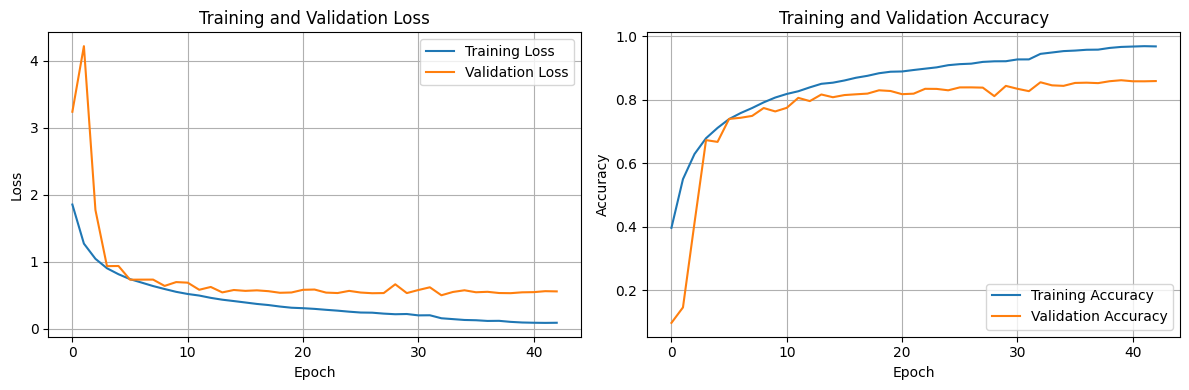

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9933 - loss: 0.0331
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8469 - loss: 0.5373
Train Accuracy with batch size=256: 0.8911
Train Loss with batch size=256: 0.3255
Test Accuracy with batch size=256: 0.8452
Test Loss with batch size=256: 0.5425


In [ ]:
batch_sizes = [32, 256]
results = {}
for batch_size in batch_sizes:
  print(f'\nTraining with batch size:{batch_size}')
  model_batch = create_cnn_model()
  model_batch.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss=tf.keras.losses.sparse_categorical_crossentropy,
      metrics=['accuracy']
  )
  history_batch = model_batch.fit(
      x_train, y_train,
      batch_size=batch_size,
      epochs=50,
      validation_split=0.2,
      callbacks=callback,
      verbose=0 # Disable the progress bar and detailed output during training
   )
  results[batch_size] = history_batch.history
  plot_train_history(history_batch)
  # Evaluate on test set
  test_loss, test_accuracy = model_batch.evaluate(x_train, y_train)
  test_loss, test_accuracy = model_batch.evaluate(x_test, y_test)
  print(f'Train Accuracy with batch size={batch_size}: {train_accuracy:.4f}')
  print(f'Train Loss with batch size={batch_size}: {train_loss:.4f}')
  print(f'Test Accuracy with batch size={batch_size}: {test_accuracy:.4f}')
  print(f'Test Loss with batch size={batch_size}: {test_loss:.4f}')

## **Task 2g: Visualisation of Convolutional Layers**
This task is using the original architecture built in Task 1, which has the following structure. *(**Note**: Since the number of filters in each layer is too large, so in this task, only 8 channels will be displayed instead of the complete channels.)*
- 3 convolutional blocks, each contains:
  - 2 convolutional layers with a 3x3 kernel
  - Filter number ranges from 32 (first block), to 64 (second block) and 128 (third block).
  - 1 normalisation layer
  - 1 max pooling layer
- 1 Fully connected layer

Therefore, there are 6 convolutional layers in total organized in three blocks in this architecture, as visualised in the output.
- Layer 1 & 2 (first block): It has 32 filters with a 3x3 kernel, performs basic feature extraction. The outputs show clear edge so it detects basic edges, textures and patterns.
- Layer 3 & 4 (second block): It has 64 filters with a 3x3 kernel, performs intermediate feature extraction. It detects complex textures, object parts and structured patterns.
- Layer 5 & 6 (third block): It has 128 filters with a 3x3 kernel,  performs advanced feature extraction. It concentrates on complete object representations and classification.


In [ ]:
def visualize_conv_layers(model, sample_image, max_channels_to_show=8):
  # Show the original image
  plt.figure(figsize=(3, 3))
  plt.imshow(sample_image)
  plt.title(f"Original Test Image")
  plt.axis('off')
  plt.show()

  conv_layers = []
  for i, layer in enumerate(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
      conv_layers.append((i, layer))
  print(f'Found {len(conv_layers)} convolutional layers in the model.')

  # Visualize each layer
  for layer_num, (layer_index, layer_obj) in enumerate(conv_layers):
    print(f'\nVisualizing layer {layer_num + 1}: {layer.name}')
    # Create model that outputs specific layer
    dummy_input = np.expand_dims(sample_image, axis=0)
    _ = model.predict(dummy_input, verbose=0)

    # Create intermediate model
    intermediate_model = tf.keras.Model(
        inputs=model.inputs,
        outputs=layer_obj.output
    )

    # Get the feature maps
    feature_maps = intermediate_model.predict(dummy_input, verbose=0)
    feature_maps_single = feature_maps[0]  # Remove batch dimension

    print(f"Output shape: {feature_maps_single.shape}")

    # Show channels
    channels_to_show = min(max_channels_to_show, feature_maps_single.shape[2])

    # Create subplots
    if channels_to_show > 1:
      fig, axes = plt.subplots(1, channels_to_show, figsize=(15, 3))
    else:
      fig, ax = plt.subplots(1, 1, figsize=(5, 4))
      axes = [ax]

    # Display each channel
    for channel_idx in range(channels_to_show):
      channel_data = feature_maps_single[:, :, channel_idx]

      # Normalize to [0, 1]
      channel_min = channel_data.min()
      channel_max = channel_data.max()
      if channel_max > channel_min:
          channel_data = (channel_data - channel_min) / (channel_max - channel_min)
      else:
          channel_data = np.zeros_like(channel_data)

      axes[channel_idx].imshow(channel_data, cmap='gray')
      axes[channel_idx].set_title(f'Ch {channel_idx+1}')
      axes[channel_idx].axis('off')

    plt.suptitle(f'Layer {layer_num+1}: {layer_obj.name}')
    plt.tight_layout()
    plt.show()



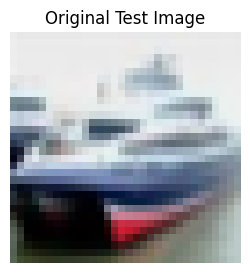

Found 6 convolutional layers in the model.

Visualizing layer 1: dense_1
Output shape: (32, 32, 32)


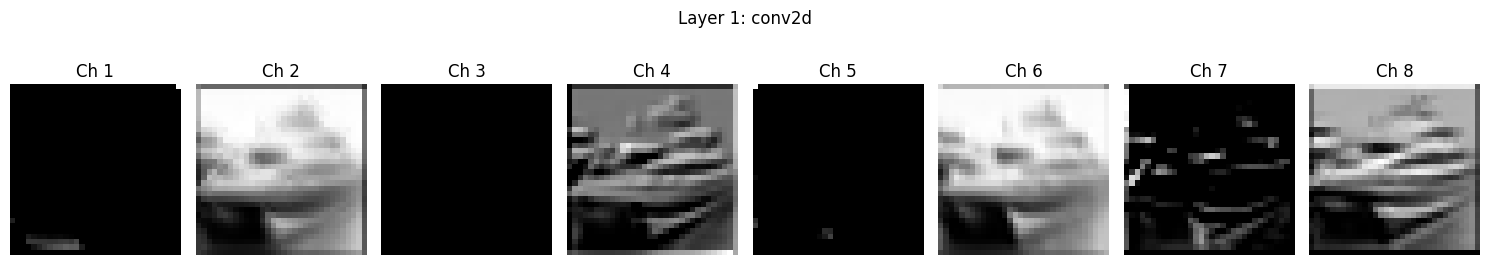


Visualizing layer 2: dense_1
Output shape: (32, 32, 32)


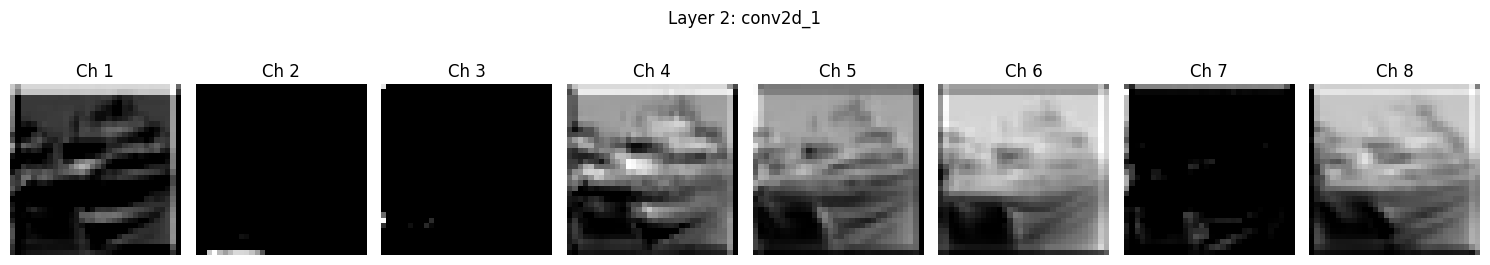


Visualizing layer 3: dense_1
Output shape: (16, 16, 64)


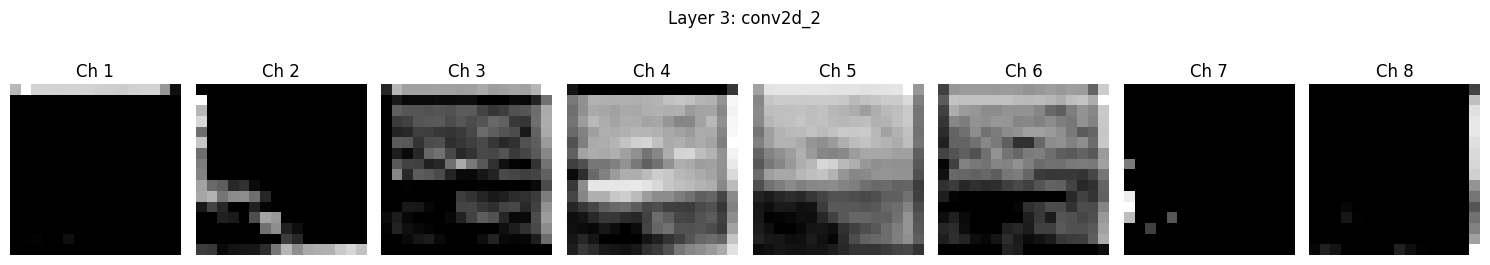


Visualizing layer 4: dense_1
Output shape: (16, 16, 64)


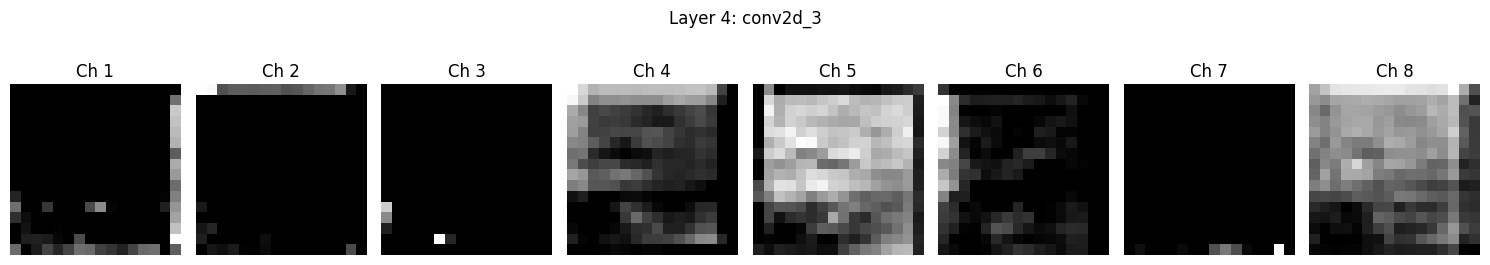


Visualizing layer 5: dense_1
Output shape: (8, 8, 128)


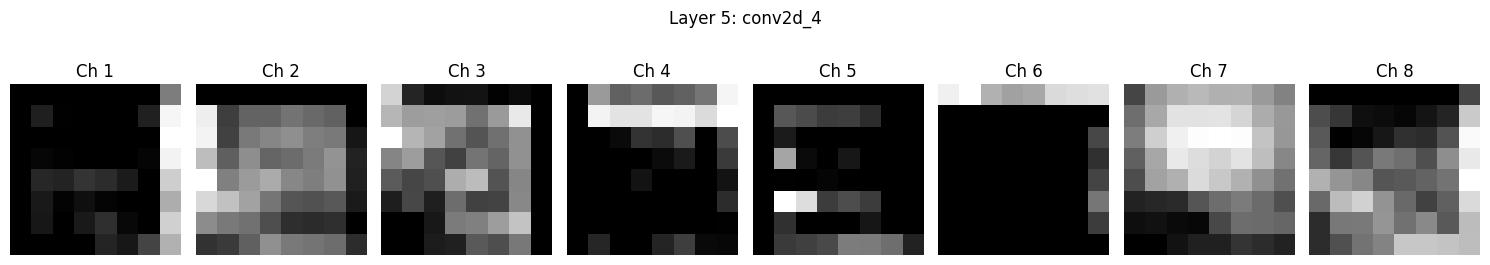


Visualizing layer 6: dense_1
Output shape: (8, 8, 128)


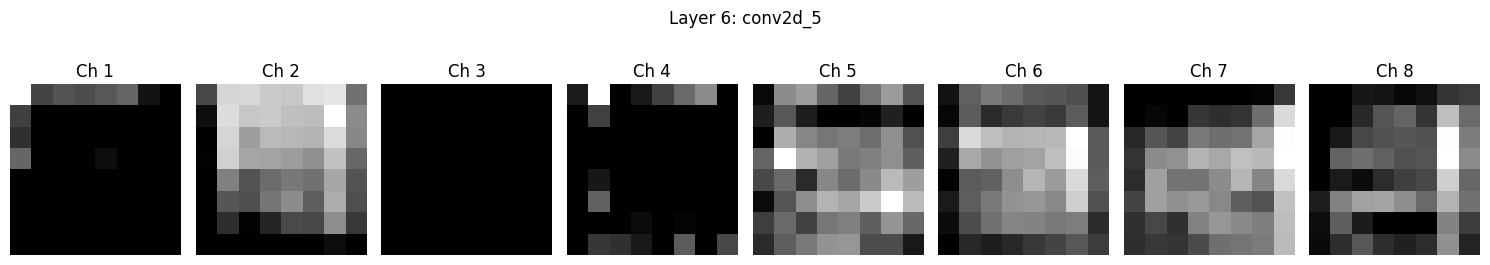

In [ ]:
# Prepare a sample image
sample_image = x_test[1]
visualize_conv_layers(model, sample_image)